# Data Preperation

In [0]:
#pip install keras

### https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/

### https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
data=pd.read_csv("/content/drive/My Drive/RP/Code/ILINet.csv")
data1=data[(data["REGION"]=='Region 1') & (data["YEAR"]>2009) & (data["YEAR"]<=2016)]
r1=data1[["% WEIGHTED ILI"]]
r1["week"]=range(1,len(r1)+1)
r1 = r1.set_index('week')
train = r1[:int(0.8*(len(r1)))]
valid = r1[int(0.8*(len(r1))):]
r1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,% WEIGHTED ILI
week,
1,0.781852
2,0.632696
3,0.790784
4,0.783799
5,0.854759


In [0]:
r1.to_csv("r1.csv")

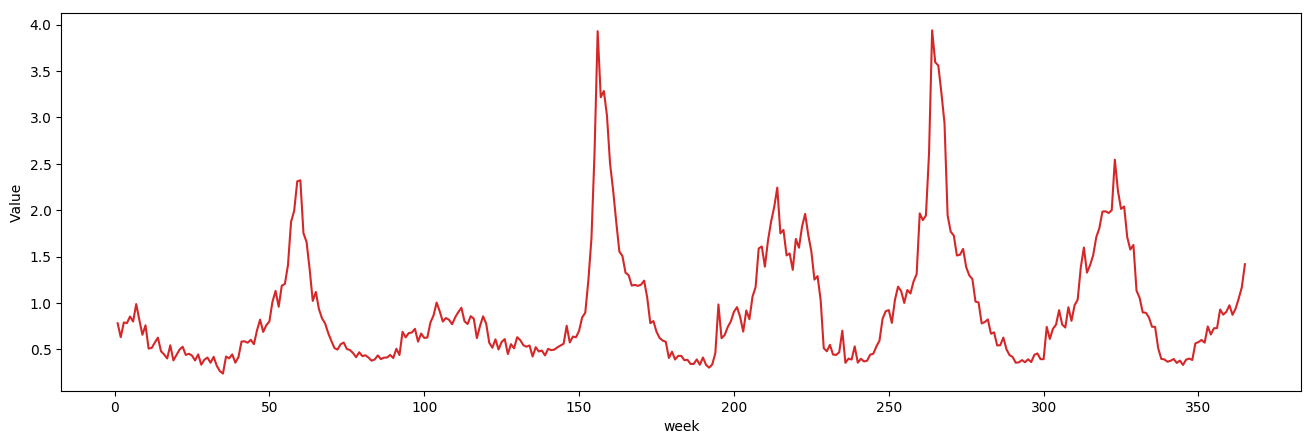

In [0]:
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt
# Draw Plot
def plot_df(r1, x, y, title="", xlabel='week', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(r1, x=r1.index, y=r1["% WEIGHTED ILI"])    

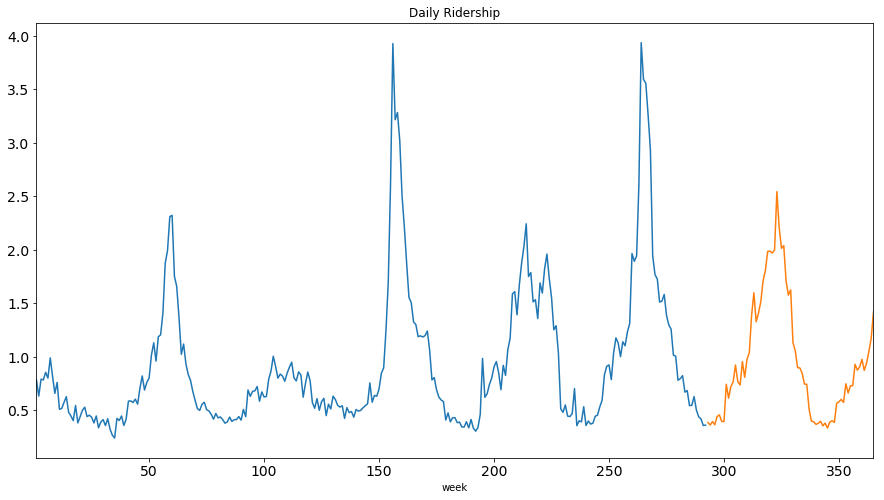

In [0]:
#Plotting data
train["% WEIGHTED ILI"].plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
valid["% WEIGHTED ILI"].plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

# Statistical Methods

## Naive Approach

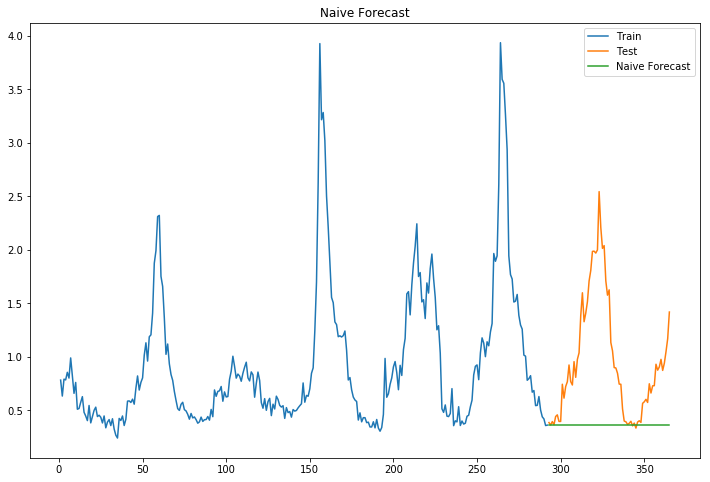

RMSE : 0.816137905110111


In [0]:
dd= np.asarray(train["% WEIGHTED ILI"])
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train["% WEIGHTED ILI"], label='Train')
plt.plot(valid.index,valid["% WEIGHTED ILI"], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()
rms = sqrt(mean_squared_error(valid["% WEIGHTED ILI"], y_hat.naive))
print("RMSE :",rms)

## Simple Average

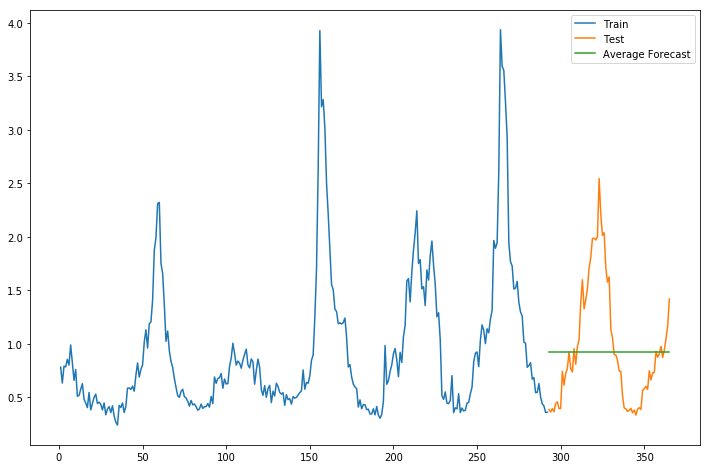

RMSE : 0.5568337347946174


In [0]:
y_hat_avg = valid.copy()
y_hat_avg['avg_forecast'] = train["% WEIGHTED ILI"].mean()
plt.figure(figsize=(12,8))
plt.plot(train["% WEIGHTED ILI"], label='Train')
plt.plot(valid["% WEIGHTED ILI"], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()
rms = sqrt(mean_squared_error(valid["% WEIGHTED ILI"], y_hat_avg.avg_forecast))
print("RMSE :",rms)

## Moving Average

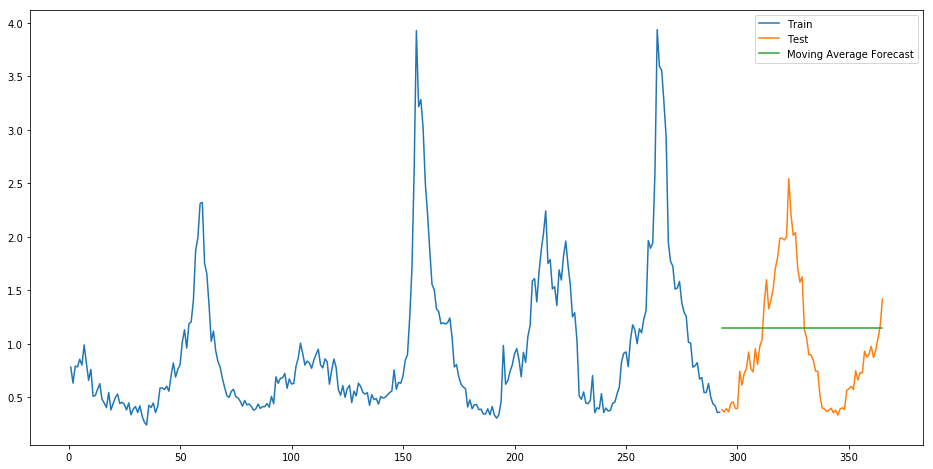

RMSE : 0.5857067962668193


In [0]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = train["% WEIGHTED ILI"].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train["% WEIGHTED ILI"], label='Train')
plt.plot(valid["% WEIGHTED ILI"], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()
rms = sqrt(mean_squared_error(valid["% WEIGHTED ILI"], y_hat_avg.moving_avg_forecast))
print("RMSE :",rms)

## Simple Exponential Smoothing

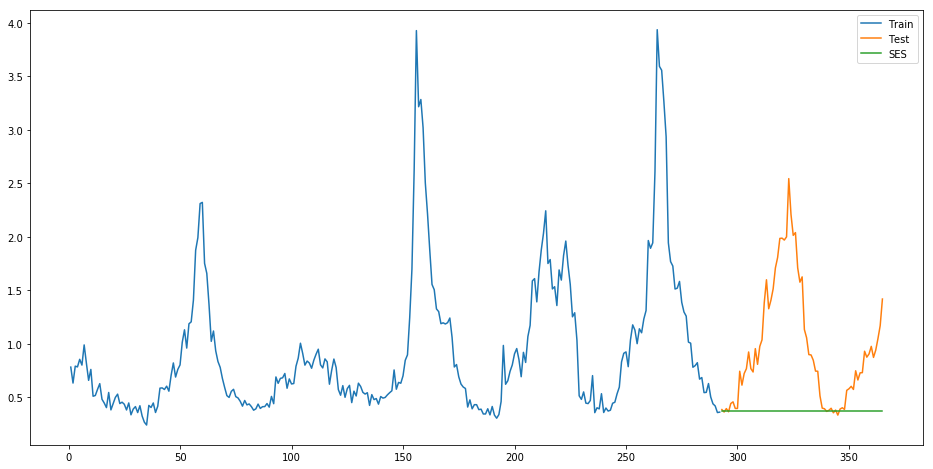

RMSE : 0.8071448422621577


In [0]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(train["% WEIGHTED ILI"])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(train["% WEIGHTED ILI"], label='Train')
plt.plot(valid["% WEIGHTED ILI"], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()
rms = sqrt(mean_squared_error(valid["% WEIGHTED ILI"], y_hat_avg.SES))
print("RMSE :",rms)

## Holt’s Linear Trend method

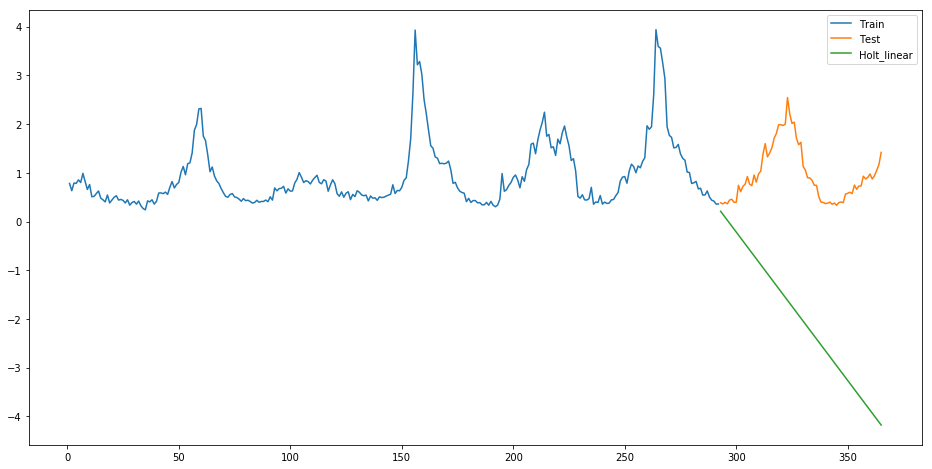

RMSE : 3.2407956351472142


In [0]:
y_hat_avg = valid.copy()

fit1 = Holt(np.asarray(train["% WEIGHTED ILI"])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(train["% WEIGHTED ILI"], label='Train')
plt.plot(valid["% WEIGHTED ILI"], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()
rms = sqrt(mean_squared_error(valid["% WEIGHTED ILI"], y_hat_avg.Holt_linear))
print("RMSE :",rms)

## Holt-Winters Method

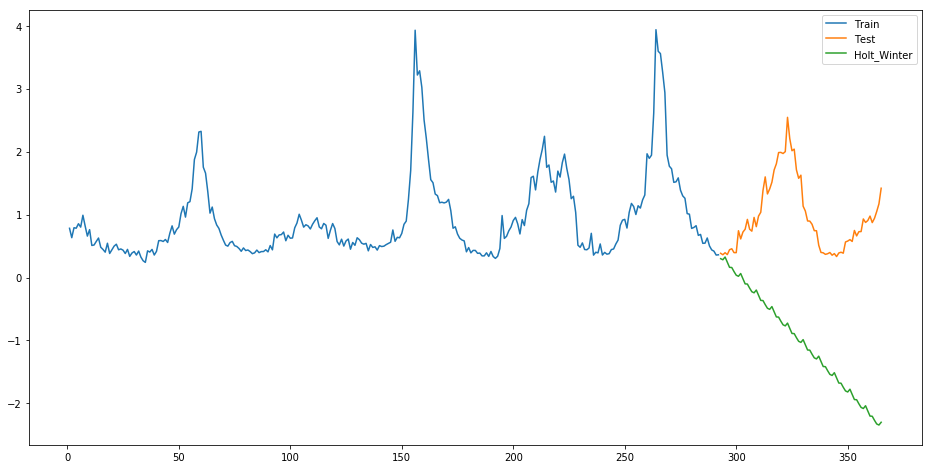

RMSE : 2.181232741204488


In [0]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(train["% WEIGHTED ILI"]) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot( train["% WEIGHTED ILI"], label='Train')
plt.plot(valid["% WEIGHTED ILI"], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()
rms = sqrt(mean_squared_error(valid["% WEIGHTED ILI"], y_hat_avg.Holt_Winter))
print("RMSE :",rms)

## ARIMA

In [0]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
X = r1["% WEIGHTED ILI"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.746294
p-value: 0.000069
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


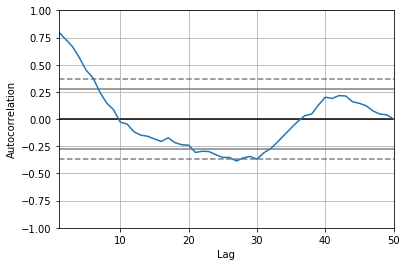

In [0]:
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(r1[0:50])
pyplot.show()

In [0]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.80)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = math.sqrt(mean_squared_error(test, predictions))
	return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s RMSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
series = r1.copy()
# evaluate parameters
p_values = [0,1,2,3,4,5]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

In [0]:
import math
math.sqrt(0.023)

0.15165750888103102

# Deep Learning

### RNN-LSTM Udemy

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train = sc.fit_transform(train)
X_train = []
y_train = []
for i in range(60, 292):
    X_train.append(train[i-60:i, 0])
    y_train.append(train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 500, batch_size = 8)
#dataset_total = pd.concat((train[['% WEIGHTED ILI']], valid[['% WEIGHTED ILI']]), axis = 0)
inputs = r1[len(r1) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 133):    # Add 60 to length of test data 
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred = regressor.predict(X_test)
pred = sc.inverse_transform(pred)
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(valid,pred))
rmse

Epoch 1/500
232/232 [==============================] - 14s 61ms/step - loss: 0.0417
Epoch 2/500
232/232 [==============================] - 8s 33ms/step - loss: 0.0292
Epoch 3/500
232/232 [==============================] - 7s 32ms/step - loss: 0.0273
Epoch 4/500
232/232 [==============================] - 8s 33ms/step - loss: 0.0226
Epoch 5/500
232/232 [==============================] - 8s 33ms/step - loss: 0.0225
Epoch 6/500
232/232 [==============================] - 8s 33ms/step - loss: 0.0202
Epoch 7/500
232/232 [==============================] - 7s 32ms/step - loss: 0.0237
Epoch 8/500
232/232 [==============================] - 8s 33ms/step - loss: 0.0192
Epoch 9/500
232/232 [==============================] - 7s 32ms/step - loss: 0.0233
Epoch 10/500
232/232 [==============================] - 8s 32ms/step - loss: 0.0264
Epoch 11/500
232/232 [==============================] - 8s 32ms/step - loss: 0.0203
Epoch 12/500
232/232 [==============================] - 8s 32ms/step - loss: 0.0207


0.20702542829054912

### LSTM Network for Regression

Epoch 1/100
 - 1s - loss: 0.0331
Epoch 2/100
 - 1s - loss: 0.0222
Epoch 3/100
 - 1s - loss: 0.0174
Epoch 4/100
 - 0s - loss: 0.0128
Epoch 5/100
 - 0s - loss: 0.0086
Epoch 6/100
 - 0s - loss: 0.0057
Epoch 7/100
 - 1s - loss: 0.0042
Epoch 8/100
 - 1s - loss: 0.0036
Epoch 9/100
 - 1s - loss: 0.0035
Epoch 10/100
 - 1s - loss: 0.0034
Epoch 11/100
 - 1s - loss: 0.0033
Epoch 12/100
 - 1s - loss: 0.0033
Epoch 13/100
 - 1s - loss: 0.0033
Epoch 14/100
 - 1s - loss: 0.0033
Epoch 15/100
 - 1s - loss: 0.0034
Epoch 16/100
 - 1s - loss: 0.0033
Epoch 17/100
 - 1s - loss: 0.0033
Epoch 18/100
 - 1s - loss: 0.0033
Epoch 19/100
 - 1s - loss: 0.0034
Epoch 20/100
 - 0s - loss: 0.0033
Epoch 21/100
 - 0s - loss: 0.0033
Epoch 22/100
 - 1s - loss: 0.0034
Epoch 23/100
 - 1s - loss: 0.0033
Epoch 24/100
 - 1s - loss: 0.0033
Epoch 25/100
 - 1s - loss: 0.0033
Epoch 26/100
 - 1s - loss: 0.0033
Epoch 27/100
 - 1s - loss: 0.0032
Epoch 28/100
 - 0s - loss: 0.0033
Epoch 29/100
 - 0s - loss: 0.0033
Epoch 30/100
 - 1s - lo

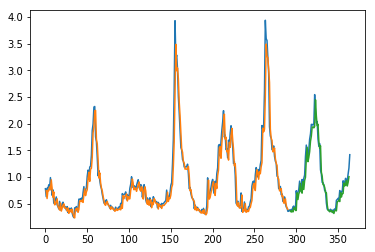

In [0]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe =r1.copy()
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### LSTM for Regression Using the Window Method

Epoch 1/100
 - 1s - loss: 0.0405
Epoch 2/100
 - 0s - loss: 0.0247
Epoch 3/100
 - 1s - loss: 0.0176
Epoch 4/100
 - 1s - loss: 0.0122
Epoch 5/100
 - 0s - loss: 0.0094
Epoch 6/100
 - 0s - loss: 0.0080
Epoch 7/100
 - 1s - loss: 0.0077
Epoch 8/100
 - 1s - loss: 0.0072
Epoch 9/100
 - 1s - loss: 0.0070
Epoch 10/100
 - 0s - loss: 0.0067
Epoch 11/100
 - 0s - loss: 0.0063
Epoch 12/100
 - 0s - loss: 0.0060
Epoch 13/100
 - 1s - loss: 0.0056
Epoch 14/100
 - 0s - loss: 0.0056
Epoch 15/100
 - 1s - loss: 0.0052
Epoch 16/100
 - 1s - loss: 0.0049
Epoch 17/100
 - 0s - loss: 0.0047
Epoch 18/100
 - 0s - loss: 0.0045
Epoch 19/100
 - 1s - loss: 0.0043
Epoch 20/100
 - 1s - loss: 0.0041
Epoch 21/100
 - 0s - loss: 0.0039
Epoch 22/100
 - 1s - loss: 0.0038
Epoch 23/100
 - 1s - loss: 0.0037
Epoch 24/100
 - 0s - loss: 0.0036
Epoch 25/100
 - 1s - loss: 0.0035
Epoch 26/100
 - 1s - loss: 0.0034
Epoch 27/100
 - 1s - loss: 0.0035
Epoch 28/100
 - 1s - loss: 0.0034
Epoch 29/100
 - 0s - loss: 0.0035
Epoch 30/100
 - 0s - lo

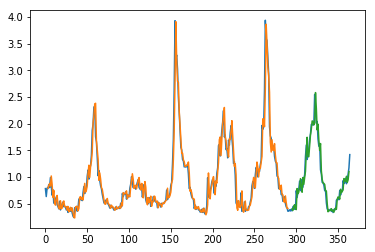

In [0]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = r1.copy()
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### LSTM for Regression with Time Steps

Epoch 1/100
 - 2s - loss: 0.0225
Epoch 2/100
 - 1s - loss: 0.0132
Epoch 3/100
 - 1s - loss: 0.0088
Epoch 4/100
 - 1s - loss: 0.0070
Epoch 5/100
 - 1s - loss: 0.0066
Epoch 6/100
 - 1s - loss: 0.0063
Epoch 7/100
 - 1s - loss: 0.0063
Epoch 8/100
 - 1s - loss: 0.0061
Epoch 9/100
 - 1s - loss: 0.0062
Epoch 10/100
 - 1s - loss: 0.0061
Epoch 11/100
 - 1s - loss: 0.0060
Epoch 12/100
 - 1s - loss: 0.0059
Epoch 13/100
 - 1s - loss: 0.0057
Epoch 14/100
 - 1s - loss: 0.0059
Epoch 15/100
 - 1s - loss: 0.0058
Epoch 16/100
 - 1s - loss: 0.0056
Epoch 17/100
 - 1s - loss: 0.0057
Epoch 18/100
 - 1s - loss: 0.0055
Epoch 19/100
 - 1s - loss: 0.0054
Epoch 20/100
 - 1s - loss: 0.0054
Epoch 21/100
 - 1s - loss: 0.0053
Epoch 22/100
 - 1s - loss: 0.0052
Epoch 23/100
 - 1s - loss: 0.0051
Epoch 24/100
 - 1s - loss: 0.0050
Epoch 25/100
 - 1s - loss: 0.0050
Epoch 26/100
 - 1s - loss: 0.0048
Epoch 27/100
 - 1s - loss: 0.0047
Epoch 28/100
 - 1s - loss: 0.0045
Epoch 29/100
 - 1s - loss: 0.0046
Epoch 30/100
 - 1s - lo

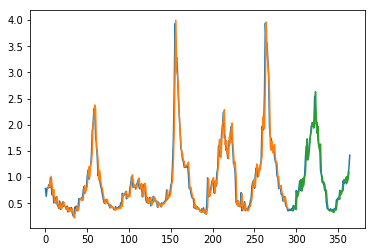

In [0]:
# LSTM for international airline passengers problem with time step regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe =r1.copy()
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### LSTM with Memory Between Batches

Epoch 1/1
 - 2s - loss: 0.0172
Epoch 1/1
 - 1s - loss: 0.0133
Epoch 1/1
 - 1s - loss: 0.0119
Epoch 1/1
 - 1s - loss: 0.0110
Epoch 1/1
 - 1s - loss: 0.0103
Epoch 1/1
 - 1s - loss: 0.0094
Epoch 1/1
 - 1s - loss: 0.0083
Epoch 1/1
 - 1s - loss: 0.0069
Epoch 1/1
 - 1s - loss: 0.0064
Epoch 1/1
 - 1s - loss: 0.0060
Epoch 1/1
 - 1s - loss: 0.0057
Epoch 1/1
 - 1s - loss: 0.0055
Epoch 1/1
 - 1s - loss: 0.0054
Epoch 1/1
 - 1s - loss: 0.0053
Epoch 1/1
 - 1s - loss: 0.0052
Epoch 1/1
 - 1s - loss: 0.0050
Epoch 1/1
 - 1s - loss: 0.0049
Epoch 1/1
 - 1s - loss: 0.0048
Epoch 1/1
 - 1s - loss: 0.0047
Epoch 1/1
 - 1s - loss: 0.0046
Epoch 1/1
 - 1s - loss: 0.0045
Epoch 1/1
 - 1s - loss: 0.0044
Epoch 1/1
 - 1s - loss: 0.0043
Epoch 1/1
 - 1s - loss: 0.0042
Epoch 1/1
 - 1s - loss: 0.0042
Epoch 1/1
 - 1s - loss: 0.0041
Epoch 1/1
 - 1s - loss: 0.0040
Epoch 1/1
 - 1s - loss: 0.0040
Epoch 1/1
 - 1s - loss: 0.0039
Epoch 1/1
 - 1s - loss: 0.0039
Epoch 1/1
 - 1s - loss: 0.0038
Epoch 1/1
 - 1s - loss: 0.0037
Epoch 1/

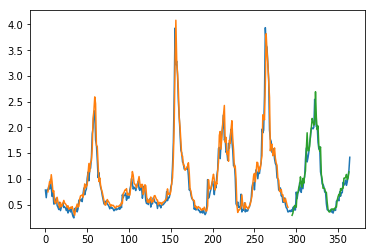

In [0]:
# LSTM for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = r1.copy()
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Stacked LSTMs with Memory Between Batches

Epoch 1/1
 - 3s - loss: 0.0252
Epoch 1/1
 - 1s - loss: 0.0186
Epoch 1/1
 - 1s - loss: 0.0172
Epoch 1/1
 - 1s - loss: 0.0165
Epoch 1/1
 - 1s - loss: 0.0158
Epoch 1/1
 - 1s - loss: 0.0153
Epoch 1/1
 - 1s - loss: 0.0148
Epoch 1/1
 - 1s - loss: 0.0145
Epoch 1/1
 - 1s - loss: 0.0142
Epoch 1/1
 - 1s - loss: 0.0140
Epoch 1/1
 - 1s - loss: 0.0137
Epoch 1/1
 - 1s - loss: 0.0135
Epoch 1/1
 - 1s - loss: 0.0132
Epoch 1/1
 - 1s - loss: 0.0128
Epoch 1/1
 - 1s - loss: 0.0124
Epoch 1/1
 - 1s - loss: 0.0119
Epoch 1/1
 - 1s - loss: 0.0114
Epoch 1/1
 - 1s - loss: 0.0109
Epoch 1/1
 - 1s - loss: 0.0104
Epoch 1/1
 - 1s - loss: 0.0100
Epoch 1/1
 - 1s - loss: 0.0095
Epoch 1/1
 - 1s - loss: 0.0091
Epoch 1/1
 - 1s - loss: 0.0086
Epoch 1/1
 - 1s - loss: 0.0082
Epoch 1/1
 - 1s - loss: 0.0077
Epoch 1/1
 - 1s - loss: 0.0074
Epoch 1/1
 - 1s - loss: 0.0070
Epoch 1/1
 - 1s - loss: 0.0067
Epoch 1/1
 - 1s - loss: 0.0064
Epoch 1/1
 - 1s - loss: 0.0060
Epoch 1/1
 - 1s - loss: 0.0057
Epoch 1/1
 - 1s - loss: 0.0054
Epoch 1/

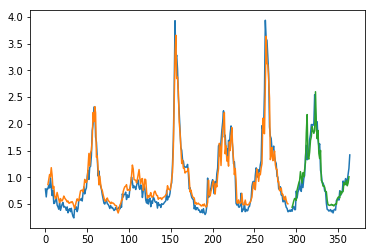

In [0]:
# Stacked LSTM for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = r1.copy()
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Multivariate Time Series

## VAR

In [0]:
data=pd.read_csv("/content/drive/My Drive/RP/Code/dl_cmu.csv")
data.head()

In [0]:
data["week"]=range(1,len(data)+1)

In [0]:
data.dtypes

r1      float64
r2      float64
r3      float64
r4      float64
r5      float64
r6      float64
r7      float64
r8      float64
r9      float64
r10     float64
week      int64
dtype: object

In [0]:
train = data[:int(0.6*(len(data)))]
valid = data[int(0.6*(len(data))):]

In [0]:
pip install statsmodels

In [0]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR
model = VAR(endog=train)
model_fit = model.fit()

In [0]:
# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt
cols=data.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,10):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for r1 is :  0.7231538258909632
rmse value for r2 is :  1.1737628950389154
rmse value for r3 is :  0.9415526046449745
rmse value for r4 is :  1.023300351892967
rmse value for r5 is :  0.8316116605048905
rmse value for r6 is :  1.639427133009215
rmse value for r7 is :  1.0641522211185999
rmse value for r8 is :  0.6759336152135235
rmse value for r9 is :  0.9993928670767671
rmse value for r10 is :  0.7388877899841522


In [0]:
#make final predictions
model = VAR(endog=data)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[1.47871371 5.71919229 2.63412794 2.95298287 1.94399269 3.52684234
  2.06486132 1.31518223 3.34156959 3.06731919]]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/